# Portfolio Assessment1 
## Duc Thuan Tran 104330455


In [2]:
%matplotlib inline

In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn  

In [4]:
!pip install ucimlrepo

In [5]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)


In [7]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [8]:
X

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.2419             0.07871  ...   25.380   
1       0.08690          0.07017     0.1812             0.05667  ...   24.990   
2       0.19740          0.12790     0.2069             0.05999  ...   23.570   
3       0.24140          0.10520     0.2597             0.09744  ...   14.910   
4       0.19800          0.10430     0.1809             0.05883  ...   22.540   
..          ...              ...        ...                 ...  ...      ...   
564     0.24390          0.13890     0.1726             0.05623  ...   25.450   
565     0.14400          0.09791     0.1752             0.05533  ...   23.690   
566     0.09251          0.05302     0.1590             0.05648  ...   18.980   
567     0.35140          0.15200     0.2397             0.07016  ...   25.740   
568     0.00000          0.00000     0.1587             0.05884  ...    9.456   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
564           0.2216     0.2060             0.07115  
565           0.1628     0.2572             0.06637  
566           0.1418     0.2218             0.07820  
567           0.2650     0.4087             0.12400  
568           0.0000     0.2871             0.07039  

[569 rows x 30 columns]

In [9]:
y

Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

In [10]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [11]:
y.isnull().sum()

Diagnosis    0
dtype: int64

# EDA

## Univariate Analysis

### Continuous Variables

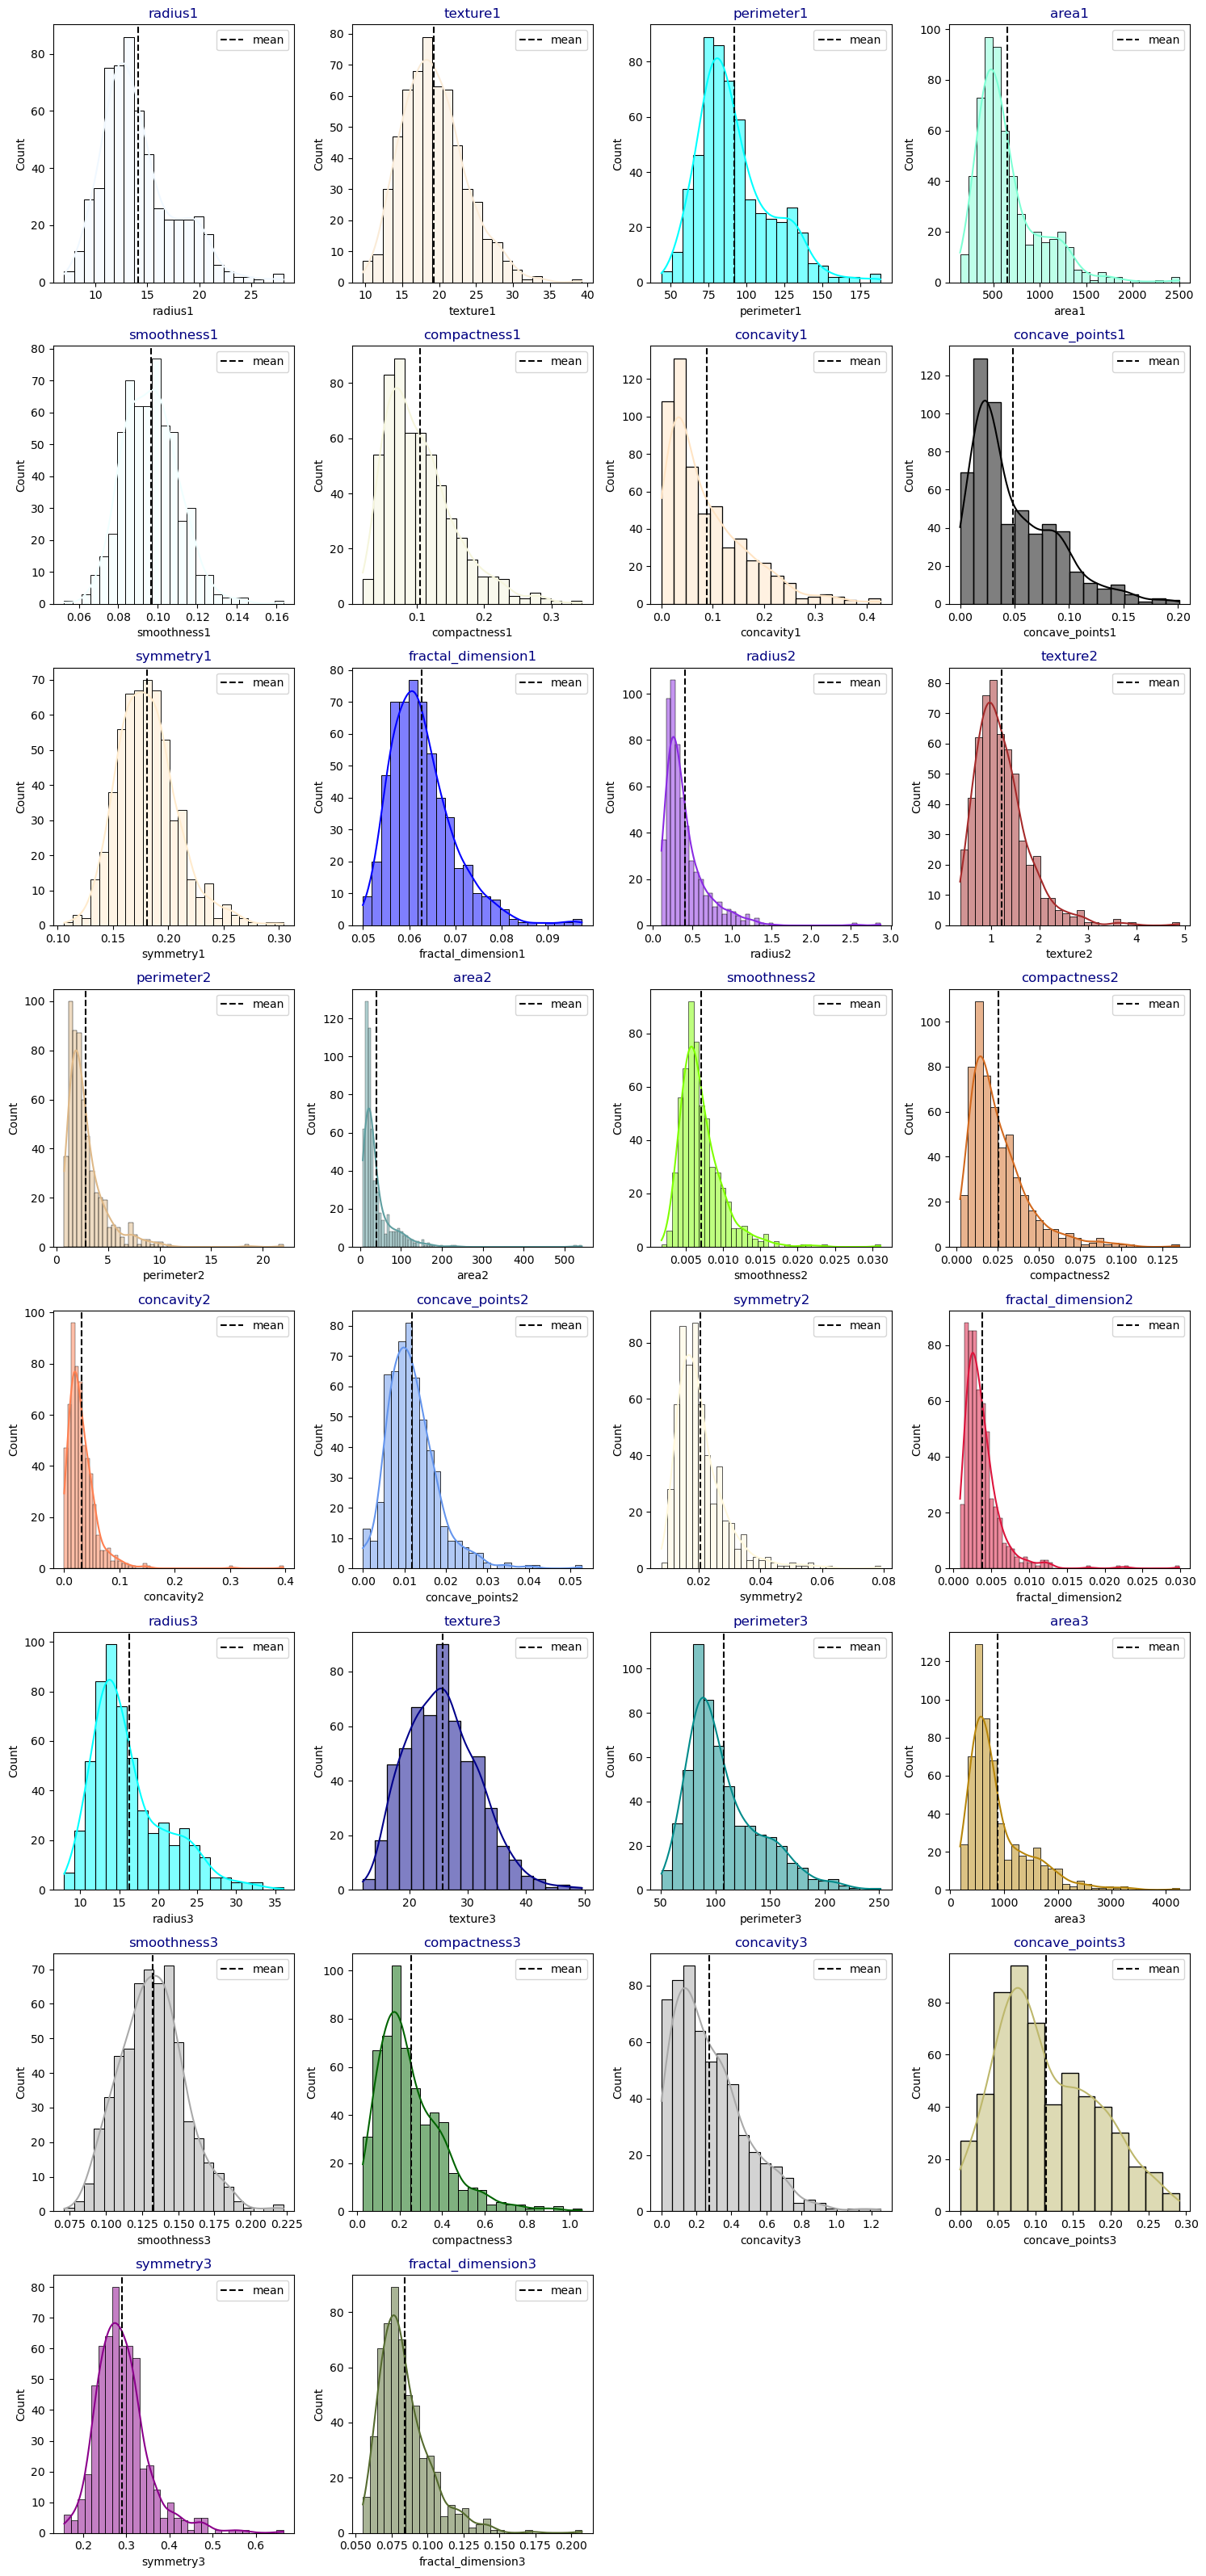

In [15]:
colors = list(mcolors.CSS4_COLORS.keys())
cs = colors[:31]

cols = [col for col in X.columns if col != 'diagnosis'] 
length = len(cols)

n_cols = 4   
n_rows = math.ceil(length / n_cols)  

plt.figure(figsize=(15, 4*n_rows))   
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)   
    ax = sns.histplot(X[col], color=cs[i-1], kde=True)
    ax.set_facecolor("w")
    plt.axvline(X[col].mean(), linestyle='dashed', label='mean', color='k')
    plt.legend(loc='best')
    plt.title(col, color='navy')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()        


### Categorical Variables

Text(0.5, 1.0, 'Breast Cancer Diagnosis Distribution')

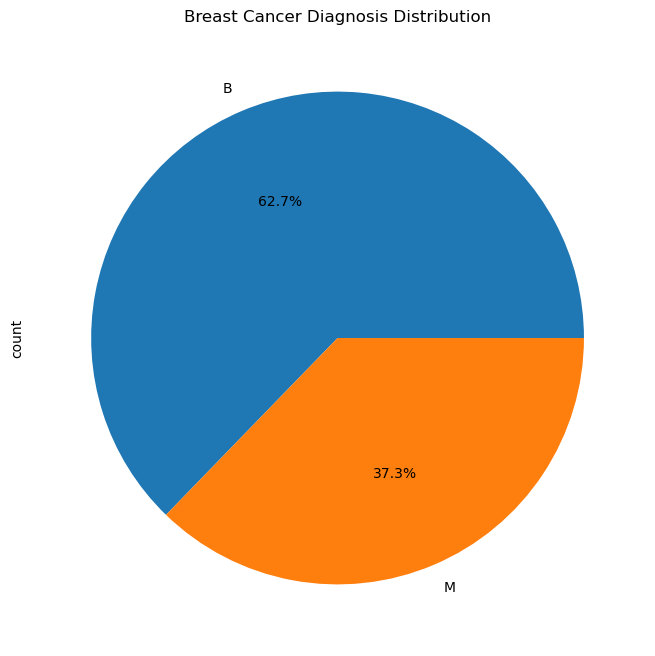

In [17]:
plt.figure(figsize=(8, 8))
y['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Breast Cancer Diagnosis Distribution')

## Summary Statistics

In [19]:
X.describe().T

count        mean         std         min         25%  \
radius1             569.0   14.127292    3.524049    6.981000   11.700000   
texture1            569.0   19.289649    4.301036    9.710000   16.170000   
perimeter1          569.0   91.969033   24.298981   43.790000   75.170000   
area1               569.0  654.889104  351.914129  143.500000  420.300000   
smoothness1         569.0    0.096360    0.014064    0.052630    0.086370   
compactness1        569.0    0.104341    0.052813    0.019380    0.064920   
concavity1          569.0    0.088799    0.079720    0.000000    0.029560   
concave_points1     569.0    0.048919    0.038803    0.000000    0.020310   
symmetry1           569.0    0.181162    0.027414    0.106000    0.161900   
fractal_dimension1  569.0    0.062798    0.007060    0.049960    0.057700   
radius2             569.0    0.405172    0.277313    0.111500    0.232400   
texture2            569.0    1.216853    0.551648    0.360200    0.833900   
perimeter2          569.0    2.866059    2.021855    0.757000    1.606000   
area2               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness2         569.0    0.007041    0.003003    0.001713    0.005169   
compactness2        569.0    0.025478    0.017908    0.002252    0.013080   
concavity2          569.0    0.031894    0.030186    0.000000    0.015090   
concave_points2     569.0    0.011796    0.006170    0.000000    0.007638   
symmetry2           569.0    0.020542    0.008266    0.007882    0.015160   
fractal_dimension2  569.0    0.003795    0.002646    0.000895    0.002248   
radius3             569.0   16.269190    4.833242    7.930000   13.010000   
texture3            569.0   25.677223    6.146258   12.020000   21.080000   
perimeter3          569.0  107.261213   33.602542   50.410000   84.110000   
area3               569.0  880.583128  569.356993  185.200000  515.300000   
smoothness3         569.0    0.132369    0.022832    0.071170    0.116600   
compactness3        569.0    0.254265    0.157336    0.027290    0.147200   
concavity3          569.0    0.272188    0.208624    0.000000    0.114500   
concave_points3     569.0    0.114606    0.065732    0.000000    0.064930   
symmetry3           569.0    0.290076    0.061867    0.156500    0.250400   
fractal_dimension3  569.0    0.083946    0.018061    0.055040    0.071460   

                           50%          75%         max  
radius1              13.370000    15.780000    28.11000  
texture1             18.840000    21.800000    39.28000  
perimeter1           86.240000   104.100000   188.50000  
area1               551.100000   782.700000  2501.00000  
smoothness1           0.095870     0.105300     0.16340  
compactness1          0.092630     0.130400     0.34540  
concavity1            0.061540     0.130700     0.42680  
concave_points1       0.033500     0.074000     0.20120  
symmetry1             0.179200     0.195700     0.30400  
fractal_dimension1    0.061540     0.066120     0.09744  
radius2               0.324200     0.478900     2.87300  
texture2              1.108000     1.474000     4.88500  
perimeter2            2.287000     3.357000    21.98000  
area2                24.530000    45.190000   542.20000  
smoothness2           0.006380     0.008146     0.03113  
compactness2          0.020450     0.032450     0.13540  
concavity2            0.025890     0.042050     0.39600  
concave_points2       0.010930     0.014710     0.05279  
symmetry2             0.018730     0.023480     0.07895  
fractal_dimension2    0.003187     0.004558     0.02984  
radius3              14.970000    18.790000    36.04000  
texture3             25.410000    29.720000    49.54000  
perimeter3           97.660000   125.400000   251.20000  
area3               686.500000  1084.000000  4254.00000  
smoothness3           0.131300     0.146000     0.22260  
compactness3          0.211900     0.339100     1.05800  
concavity3            0.226700     0.382900     1.25200  
concave_

## Multivariate Analysis

## Mean: group 1 / Se: group 2 / Worst: group 3

In [22]:
target_column = y.columns[0]
df = pd.concat([X, y], axis=1)

# Get all feature names
all_features = X.columns.tolist()

# Group features by type (mean, SE, worst)
mean_features = [col for col in all_features if col.endswith('1')]
se_features = [col for col in all_features if col.endswith('2')]
worst_features = [col for col in all_features if col.endswith('3')]


In [23]:
all_features

['radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

## Mean Features Pairplot

<Figure size 1200x1000 with 0 Axes>

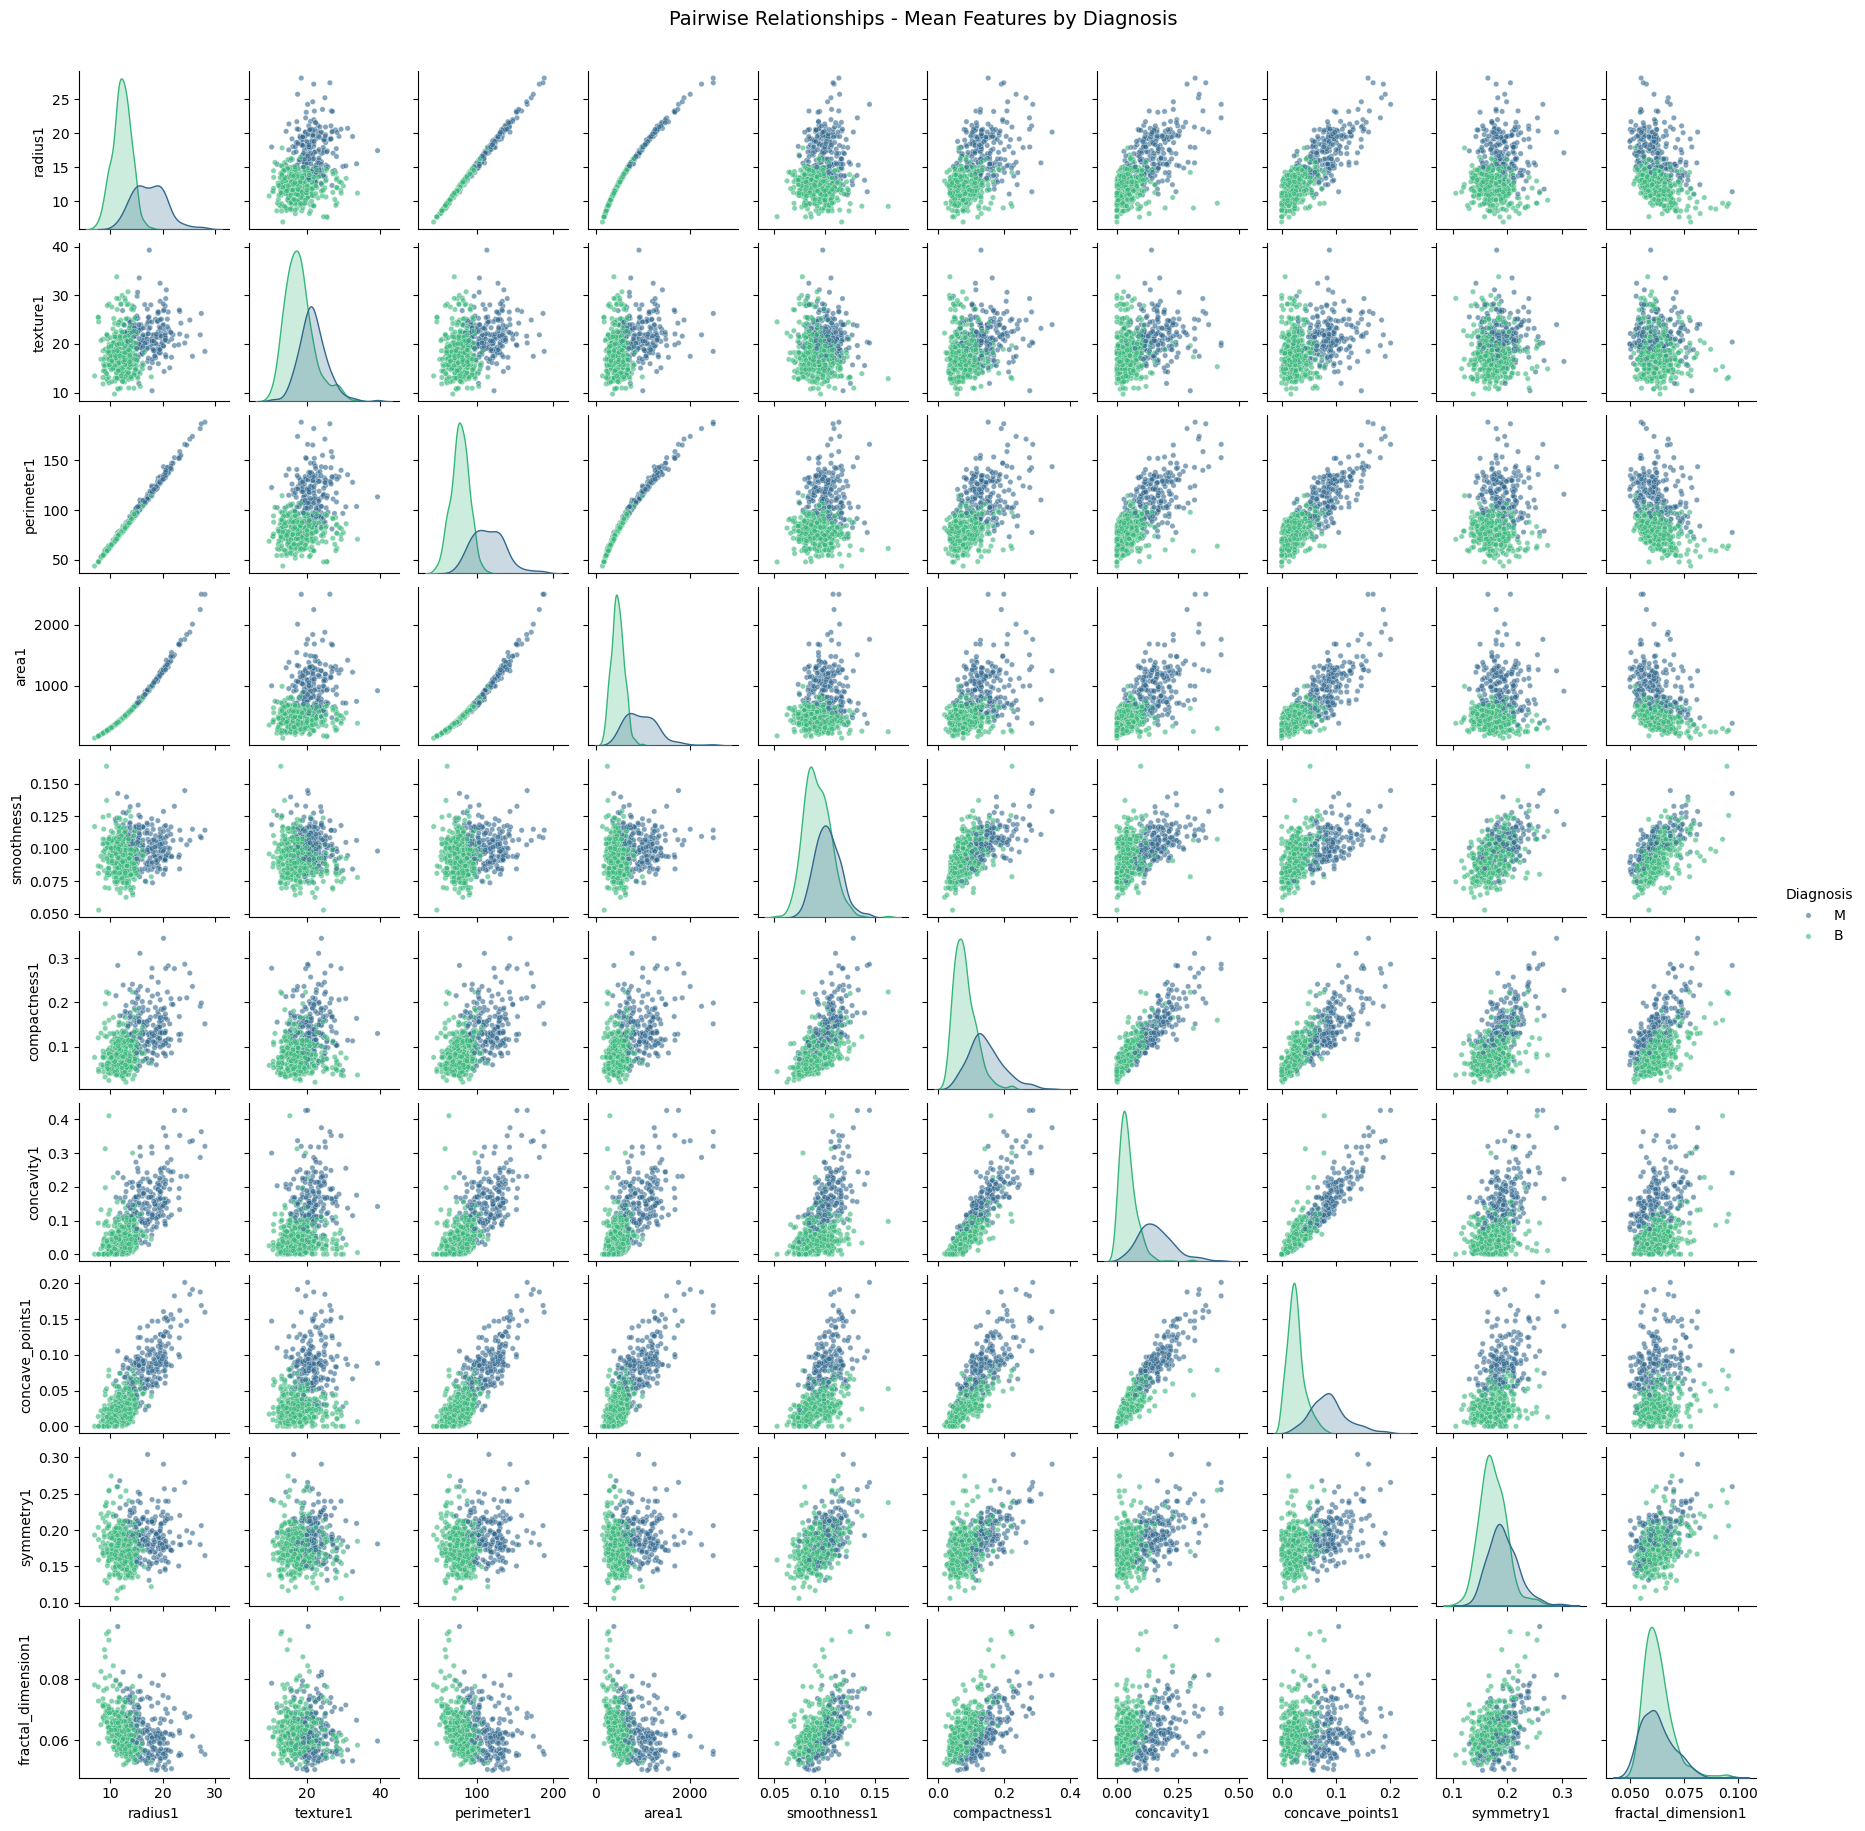

In [25]:
# Mean features pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[mean_features + [target_column]], 
             hue=target_column, 
             palette='viridis',
             plot_kws={'s': 15, 'alpha': 0.6},  
             diag_kind='kde',   
             height=1.8)  
plt.suptitle('Pairwise Relationships - Mean Features by Diagnosis', y=1.02, fontsize=14)
plt.show()

## SE Features Pairplot

<Figure size 1200x1000 with 0 Axes>

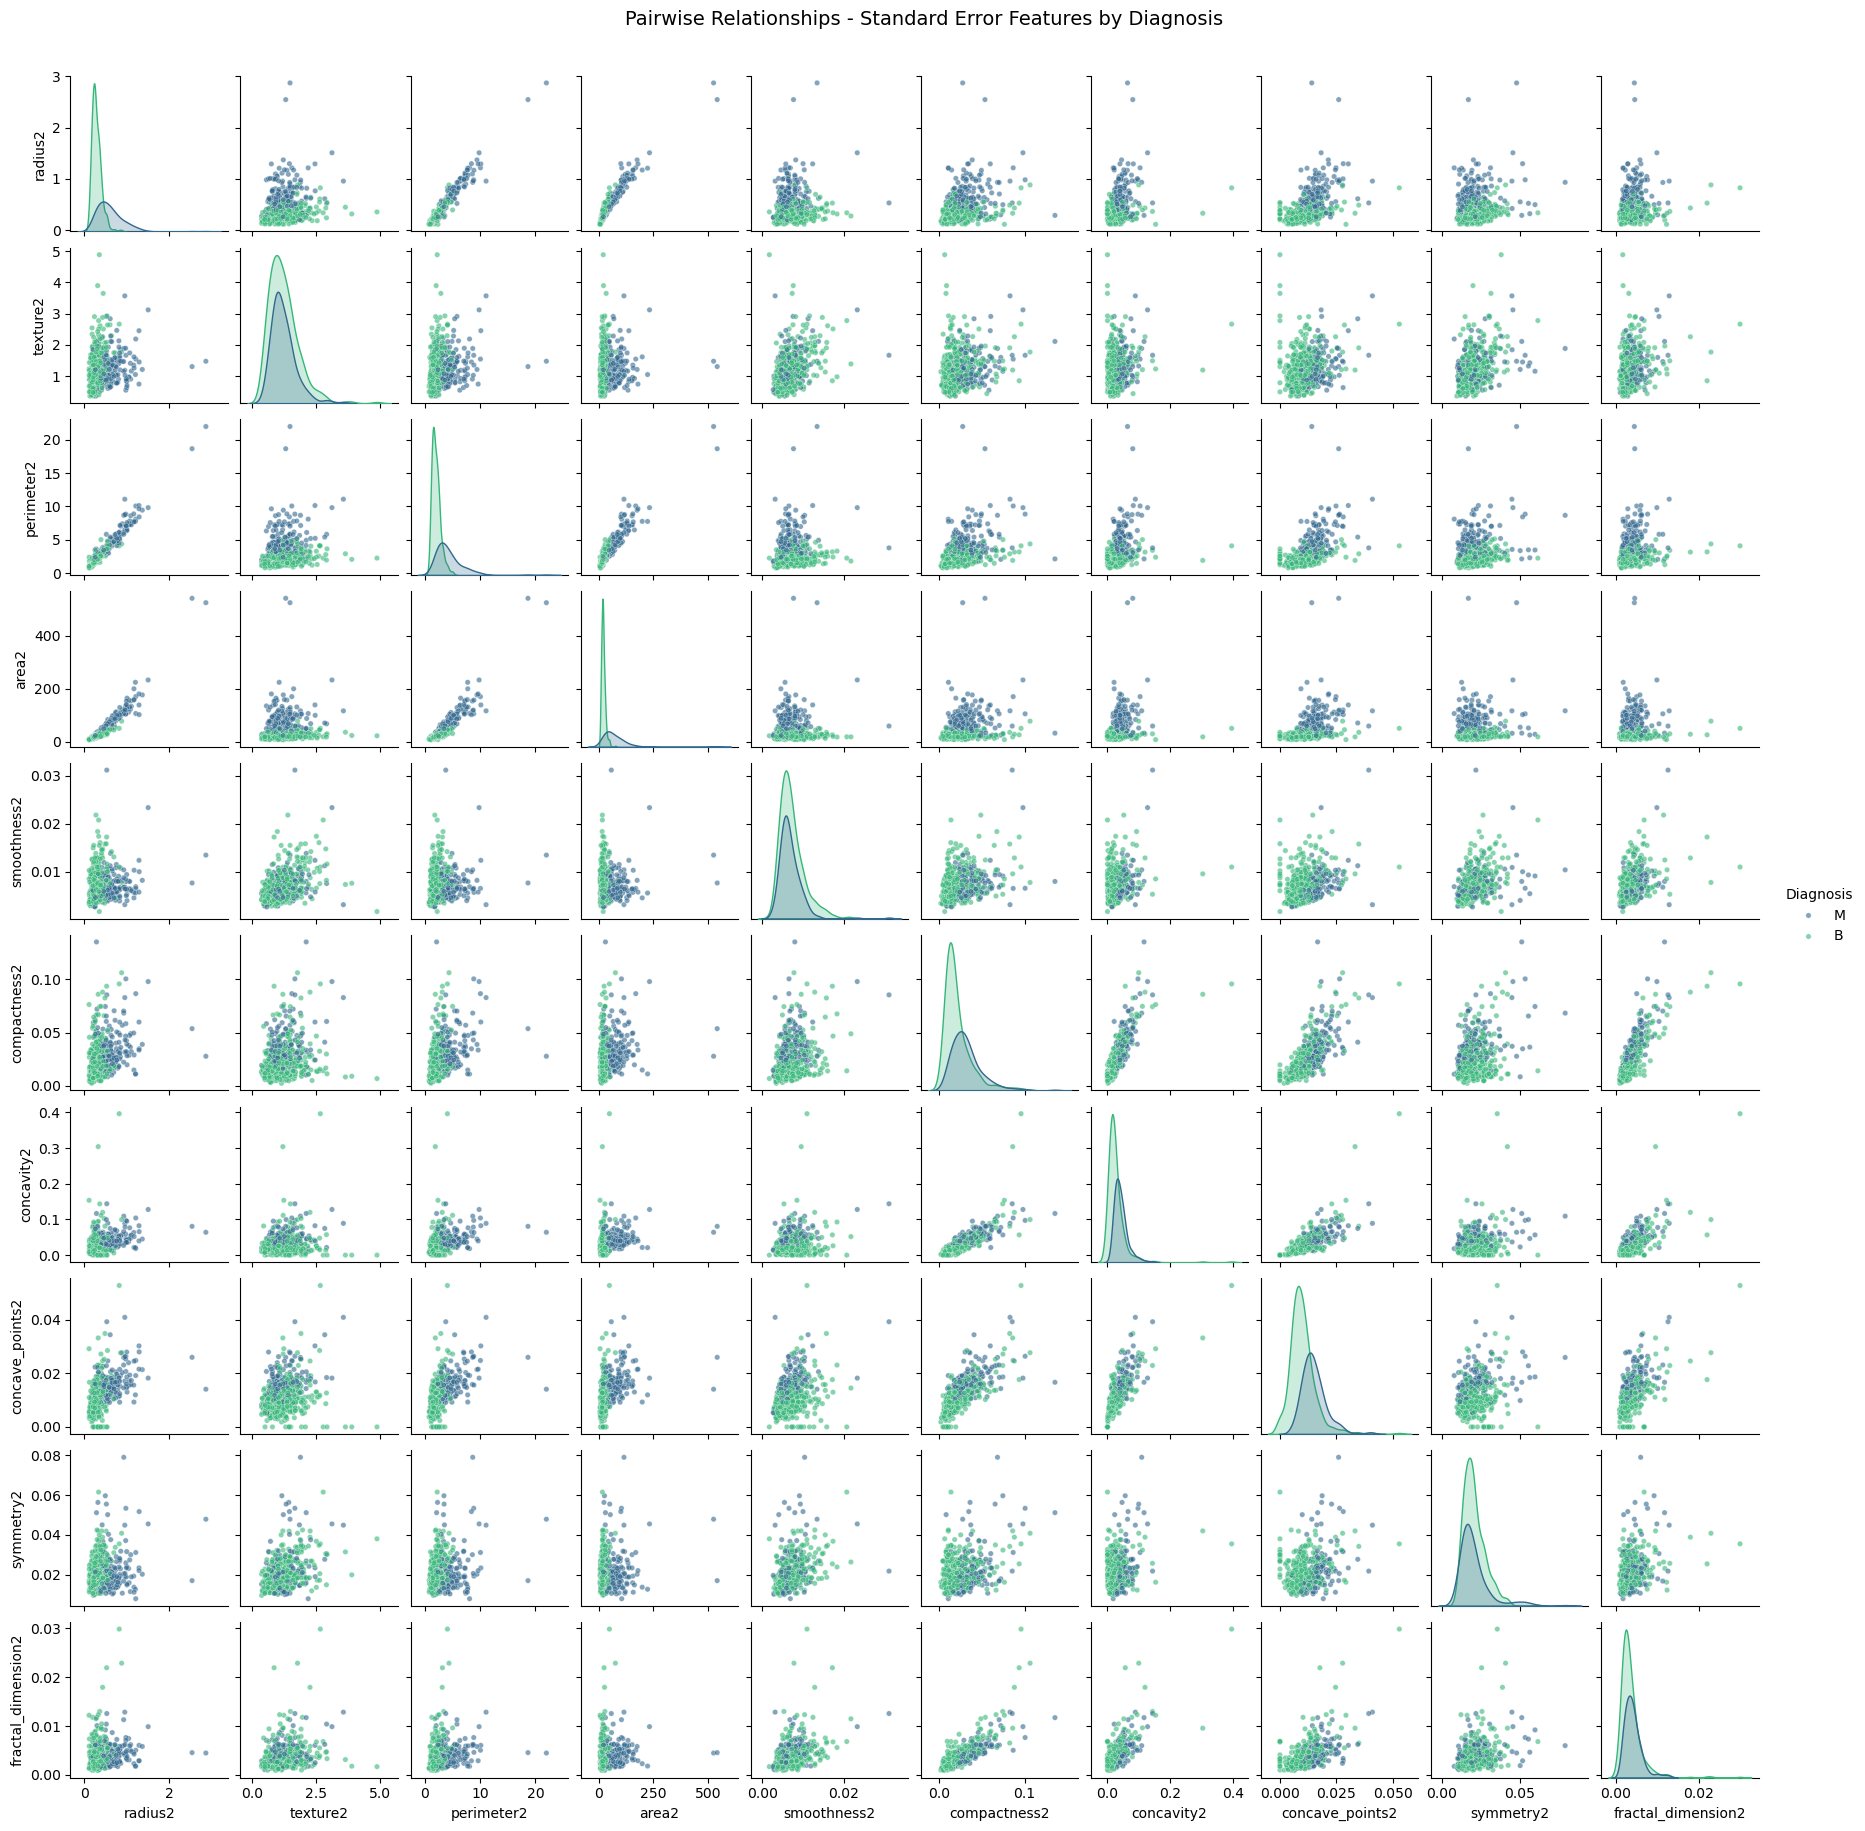

In [27]:
# SE features pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[se_features + [target_column]], 
             hue=target_column, 
             palette='viridis',
             plot_kws={'s': 15, 'alpha': 0.6},
             diag_kind='kde',
             height=1.8)
plt.suptitle('Pairwise Relationships - Standard Error Features by Diagnosis', y=1.02, fontsize=14)
plt.show()

## Worst Features Pairplot

<Figure size 1200x1000 with 0 Axes>

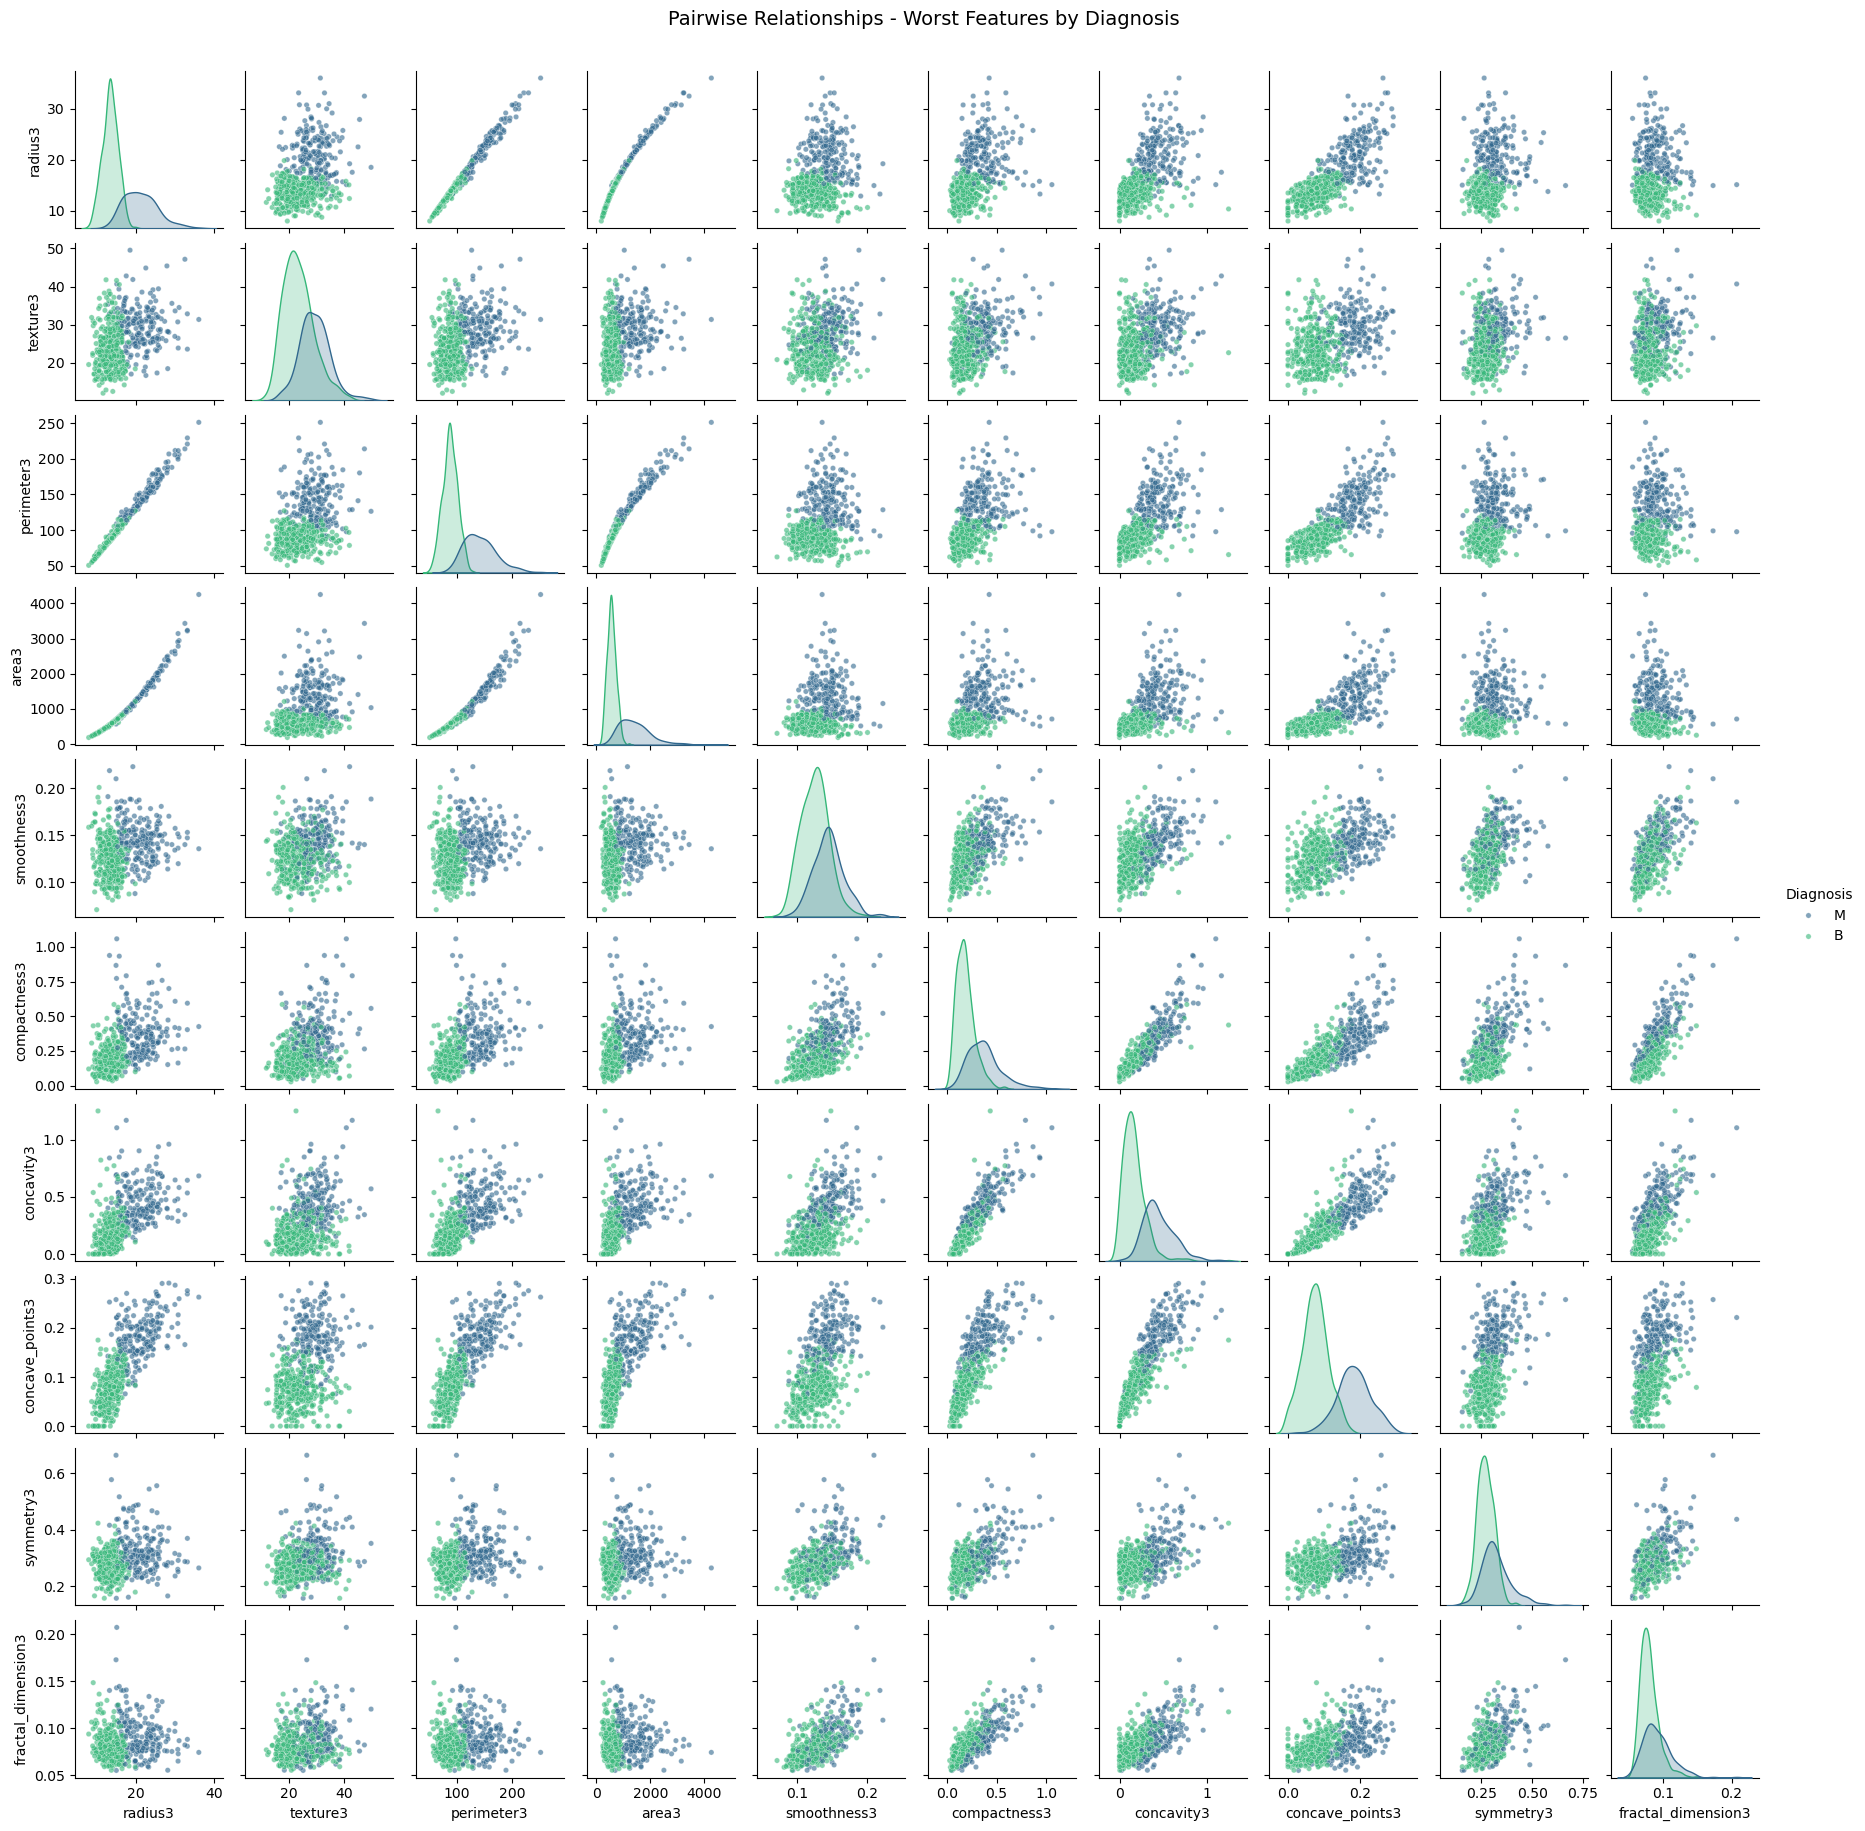

In [29]:
# Worst features pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[worst_features + [target_column]], 
             hue=target_column, 
             palette='viridis',
             plot_kws={'s': 15, 'alpha': 0.6},
             diag_kind='kde',
             height=1.8)
plt.suptitle('Pairwise Relationships - Worst Features by Diagnosis', y=1.02, fontsize=14)
plt.show()

## Correlation

In [31]:
X.corr()

radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.066280     0.068406   
perimeter2          0.674172  0.281673    0.693135  0.726628     0.296092   
area2               0.735864  0.259845    0.744983  0.800086     0.246552   
smoothness2        -0.222600  0.006614   -0.202694 -0.166777     0.332375   
compactness2        0.206000  0.191975    0.250744  0.212583     0.318943   
concavity2          0.194204  0.143293    0.228082  0.207660     0.248396   
concave_points2     0.376169  0.163851    0.407217  0.372320     0.380676   
symmetry2          -0.104321  0.009127   -0.081629 -0.072497     0.200774   
fractal_dimension2 -0.042641  0.054458   -0.005523 -0.019887     0.283607   
radius3             0.969539  0.352573    0.969476  0.962746     0.213120   
texture3            0.297008  0.912045    0.303038  0.287489     0.036072   
perimeter3          0.965137  0.358040    0.970387  0.959120     0.238853   
area3               0.941082  0.343546    0.941550  0.959213     0.206718   
smoothness3         0.119616  0.077503    0.150549  0.123523     0.805324   
compactness3        0.413463  0.277830    0.455774  0.390410     0.472468   
concavity3          0.526911  0.301025    0.563879  0.512606     0.434926   
concave_points3     0.744214  0.295316    0.771241  0.722017     0.503053   
symmetry3           0.163953  0.105008    0.189115  0.143570     0.394309   
fractal_dimension3  0.007066  0.119205    0.051019  0.003738     0.499316   

                    compactness1  concavity1  concave_points1  symmetry1  \
radius1                 0.506124    0.676764         0.822529   0.147741   
texture1                0.236702    0.302418         0.293464   0.071401   
perimeter1              0.556936    0.716136         0.850977   0.183027   
area1                   0.498502    0.685983         0.823269   0.151293   
smoothness1             0.659123    0.521984         0.553695   0.557775   
compactness1            1.000000    0.883121         0.831135   0.602641   
concavity1              0.883121    1.000000         0.921391   0.500667   
concave_points1         0.831135    0.921391         1.000000   0.462497   
symmetry1               0.602641    0.500667         0.462497   1.000000   
fractal_dimension1      0.565369    0.336783         0.166917   0.479921   
radius2                 0.497473    0.631925         0.698050   0.303379   
texture2                0.046205    0.076218         0.021480   0.128053   
perimeter2              0.548905    0.660391         0.710650   0.313893   
area2                   0.455653    0.617427         0.690299   0.223970   
smoothness2             0.135299    0.098564         0.027653   0.187321   
compactness2            0.738722    0.670279         0.490424   0.421659   
concavity2              0.570517    0.691270         0.439167   0.342627   
concave_points2         0.642262    0.683260         0.615634   0.393298   
symmetry2               0.229977    0.178009         0.095351   0.449137   
fractal_dimension2      0.507318    0.449301         0.257584   0.331786   
radius3                 0.535315    0

## All Features Heatmap

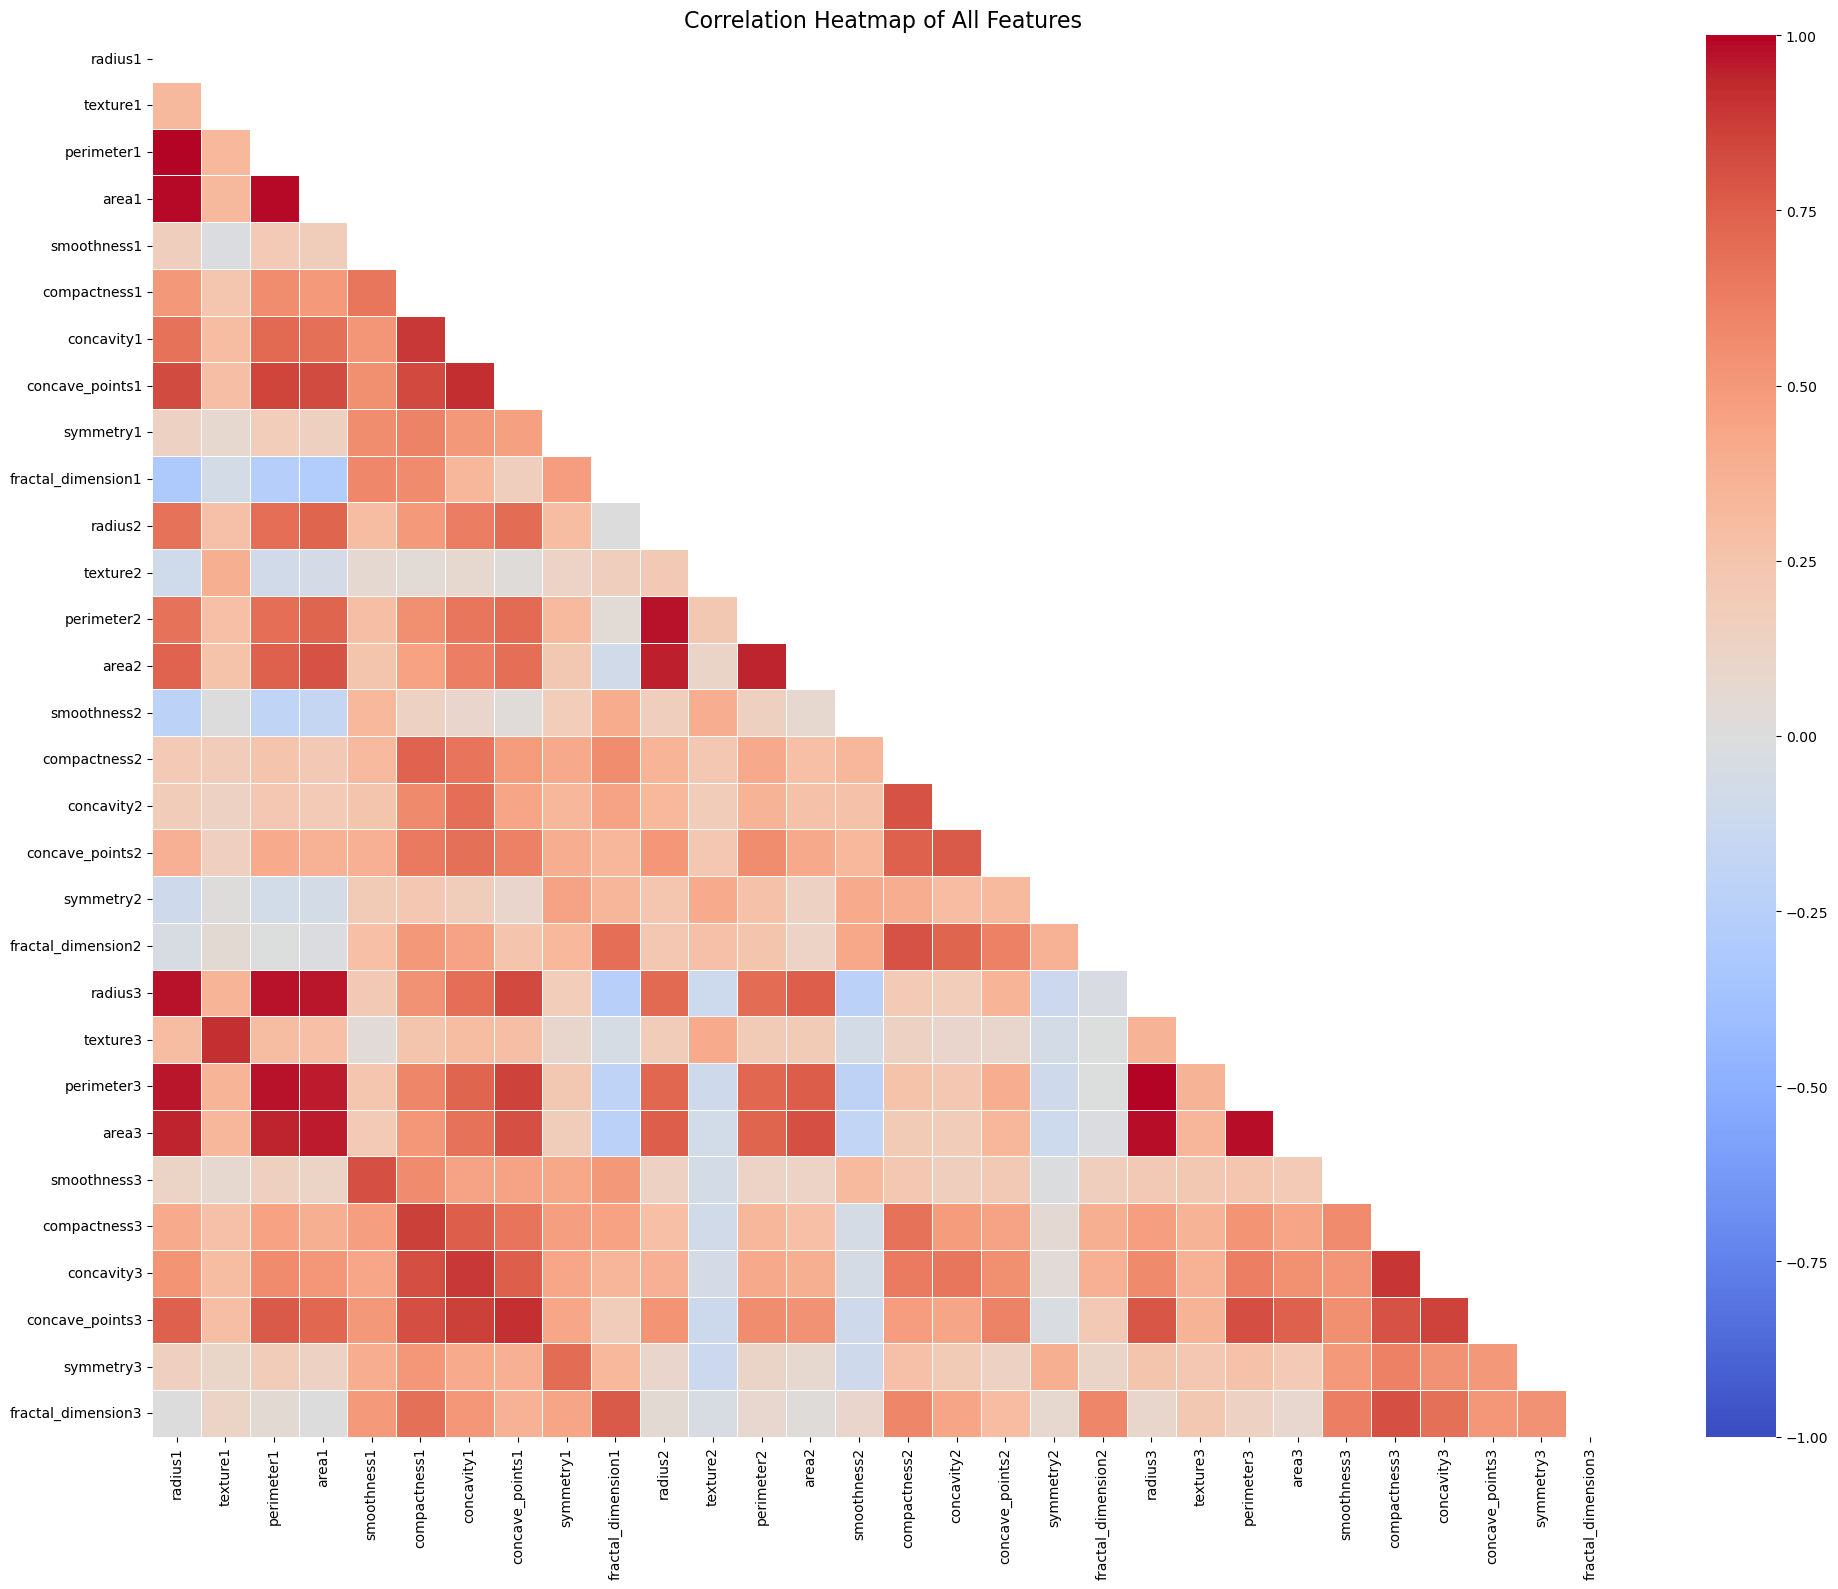

In [33]:
# Calculate correlation matrix for all features
correlation_matrix = X.corr()

plt.figure(figsize=(20, 16))
mask = np.triu(correlation_matrix)   
sns.heatmap(correlation_matrix, 
            annot=False,   
            cmap='coolwarm',
            linewidths=0.5,
            mask=mask,
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Mean Features Heatmap

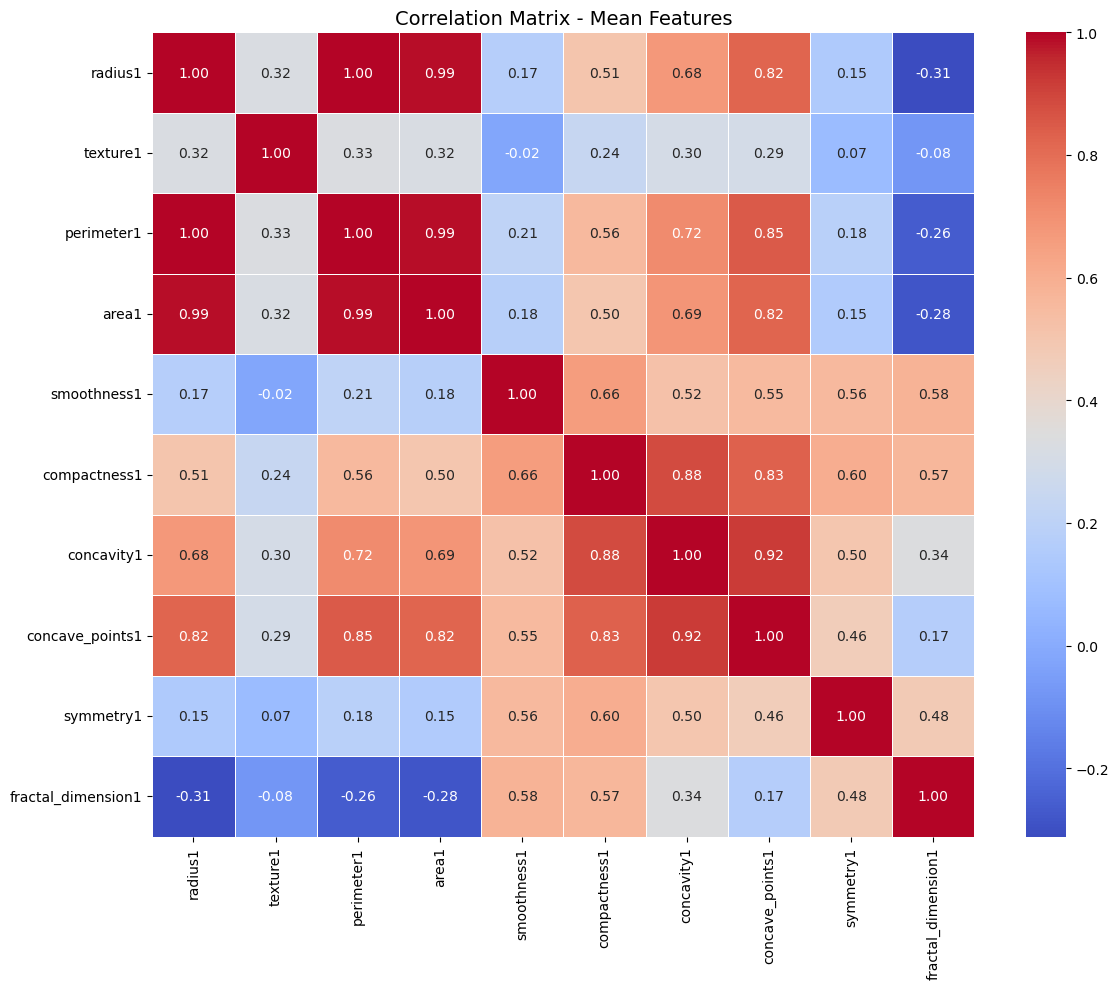

In [35]:
# Mean features heatmap
mean_features = [col for col in X.columns if col.endswith('1')]
mean_corr = X[mean_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(mean_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Mean Features', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## SE Features Heatmap

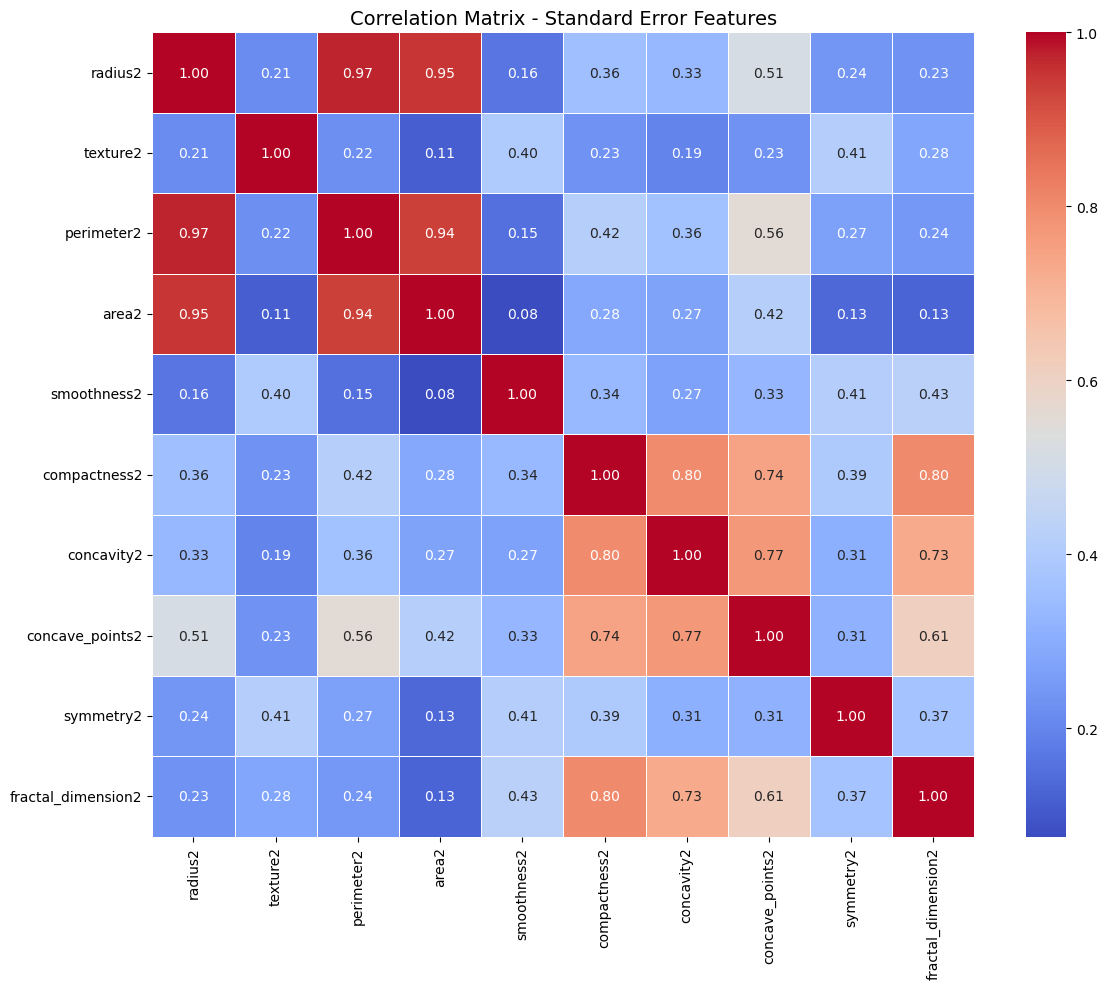

In [37]:
# Standard error features heatmap
se_features = [col for col in X.columns if col.endswith('2')]
se_corr = X[se_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(se_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Standard Error Features', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Worst Features Heatmap

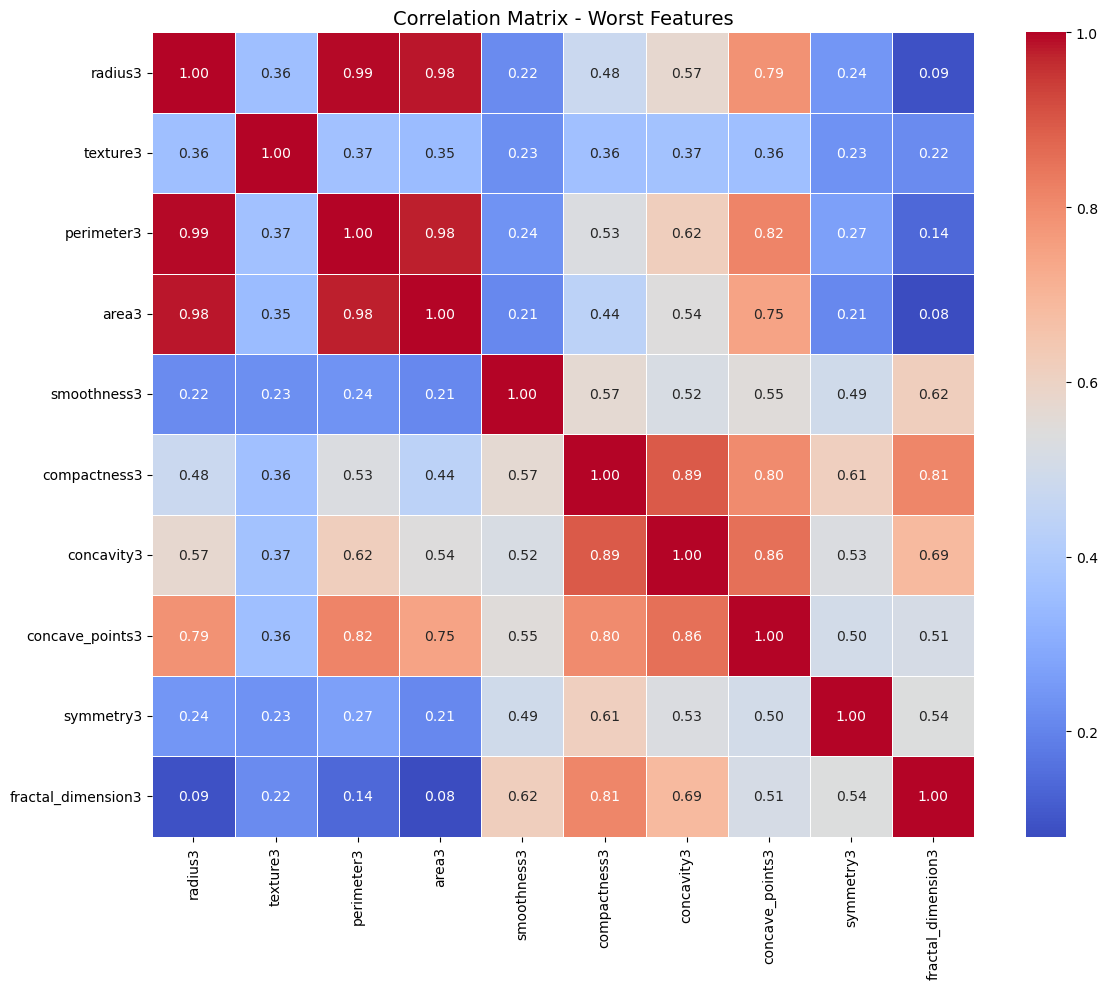

In [39]:
# Worst features heatmap
worst_features = [col for col in X.columns if col.endswith('3')]
worst_corr = X[worst_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(worst_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Worst Features', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Class Labeling 

In [41]:
key_features = ['concave_points3', 'radius3', 'concavity3', 'perimeter3', 'area3']

scaler = MinMaxScaler()
df[key_features] = scaler.fit_transform(df[key_features])

df['composite_score'] = df[key_features].mean(axis=1)

df['class_id'] = pd.qcut(df['composite_score'], 5, labels=False)

class_labels = {
    0: 'Very Low Risk',
    1: 'Low Risk',
    2: 'Moderate Risk', 
    3: 'High Risk',
    4: 'Very High Risk'
}
    
df['diagnosis'] = df['class_id'].map(class_labels)


Class distribution:
diagnosis
Very High Risk    114
High Risk         114
Very Low Risk     114
Low Risk          114
Moderate Risk     113
Name: count, dtype: int64


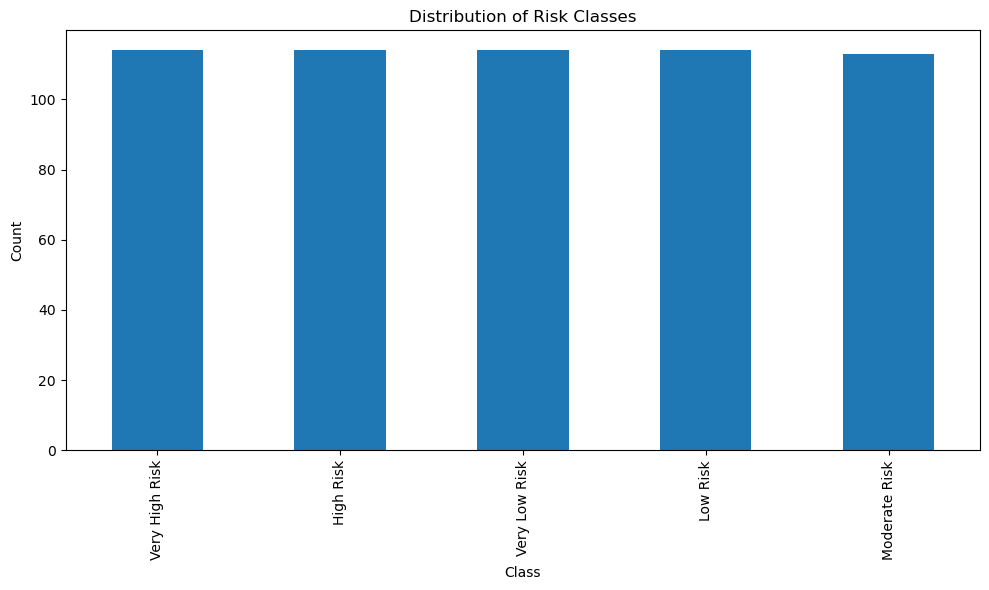

diagnosis       Diagnosis
High Risk       M            0.780702
                B            0.219298
Low Risk        B            0.982456
                M            0.017544
Moderate Risk   B            0.938053
                M            0.061947
Very High Risk  M            1.000000
Very Low Risk   B            1.000000
Name: proportion, dtype: float64


In [42]:
class_distribution = df['diagnosis'].value_counts()
print('Class distribution:')
print(class_distribution)

plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Distribution of Risk Classes')
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

alignment = df.groupby('diagnosis')[y.columns[0]].value_counts(normalize=True)
print(alignment)

## Feature Engineering 

In [44]:
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Group related features
size_features = ['radius', 'perimeter', 'area']
texture_features = ['texture']
shape_features = ['smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

engineered_features = pd.DataFrame()

# Ratio features (comparing worst to mean measurements)
for feature in X.columns:
    if feature.endswith('3') and feature.replace('3', '1') in X.columns:
        base_name = feature[:-1]
        ratio_name = f"{base_name}ratio_worst_to_mean"
        engineered_features[ratio_name] = X_normalized[feature] / X_normalized[feature.replace('3', '1')]

# Difference features (worst - mean)
for feature in X.columns:
    if feature.endswith('3') and feature.replace('3', '1') in X.columns:
        base_name = feature[:-1]
        diff_name = f"{base_name}diff_worst_mean"
        engineered_features[diff_name] = X_normalized[feature] - X_normalized[feature.replace('3', '1')]

# Shape irregularity composite score
for suffix in ['1', '2', '3']:  # For each measurement type (mean, SE, worst)
    irregularity_features = [f for f in X.columns if f.endswith(suffix) and 
                           any(shape in f for shape in ['concavity', 'concave_points', 'compactness'])]
    
    if irregularity_features:
        engineered_features[f'irregularity_score{suffix}'] = X_normalized[irregularity_features].mean(axis=1)

# Size composite score
for suffix in ['1', '2', '3']:  # For each measurement type
    size_feat = [f for f in X.columns if f.endswith(suffix) and 
                any(size in f for size in ['radius', 'perimeter', 'area'])]
    
    if size_feat:
        engineered_features[f'size_score{suffix}'] = X_normalized[size_feat].mean(axis=1)


## Feature Selection

In [46]:
# Feature Set 1: All original data features  
feature_set1 = X_normalized.copy()

# Feature Set 2: Worst features only 
worst_features = [col for col in X.columns if col.endswith('3')]
feature_set2 = X_normalized[worst_features].copy()

# Feature Set 3: Top features identified from correlation analysis
top_correlated_features = [
    'concave_points3', 'concavity3', 'radius3', 'perimeter3', 'area3', 
    'concave_points1', 'concavity1', 'radius1', 'perimeter1', 'area1'
]
feature_set3 = X_normalized[top_correlated_features].copy()


# Feature Set 4: One representative from each correlated group
# Choose one from each highly correlated group to reduce redundancy
representative_features = [
    'radius3',             
    'texture3',            
    'concave_points3',    
    'symmetry3',           
    'fractal_dimension3',  
    'radius1',             
    'concave_points1'      
]
feature_set4 = X_normalized[representative_features].copy()

# Feature Set 5: Engineered features only
feature_set5 = engineered_features.copy()

## Data Cleaning and Preparation

In [48]:
def clean_dataset(X):
    # Replace inf/-inf with NaN
    X_clean = X.copy()
    X_clean = X_clean.replace([np.inf, -np.inf], np.nan)
    
    # Replace NaN with column mean
    col_means = X_clean.mean()
    for col in X_clean.columns:
        X_clean[col] = X_clean[col].fillna(col_means[col])
    
    return X_clean

X_sets = {
    'All Original Features': clean_dataset(feature_set1),
    'Worst Features Only': clean_dataset(feature_set2),
    'Top Correlated Features': clean_dataset(feature_set3),
    'Representative Features': clean_dataset(feature_set4),
    'Engineered Features': clean_dataset(feature_set5)
}

random_state = 42  
test_size = 0.3

# Dictionary to store results
results = {}

## Model Training and Evaluation

In [50]:
for name, X in X_sets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Train decision tree model
    dt_model = DecisionTreeClassifier(random_state=random_state)
    dt_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'feature_count': X.shape[1],
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Print classification report
    print(f"\nModel: Decision Tree with {name}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Model: Decision Tree with All Original Features
Number of features: 30
Accuracy: 0.9006

Classification Report:
              precision    recall  f1-score   support

           B       0.91      0.93      0.92       107
           M       0.89      0.84      0.86        64

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171


Model: Decision Tree with Worst Features Only
Number of features: 10
Accuracy: 0.9591

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       107
           M       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Model: Decision Tree with Top Correlated Features
Number of features: 10
Accuracy: 0.9181

Classification Report:
       

## Comparison Table

In [95]:
# Comparison table
if results:   
    results_df = pd.DataFrame({
        'Feature Set': list(results.keys()),
        'Feature Count': [results[feature_set]['feature_count'] for feature_set in results],
        'Accuracy': [results[feature_set]['accuracy'] for feature_set in results],
        'Precision': [results[feature_set]['precision'] for feature_set in results],
        'Recall': [results[feature_set]['recall'] for feature_set in results],
        'F1 Score': [results[feature_set]['f1_score'] for feature_set in results]
    })

    # Sort by accuracy (descending)
    results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

    # Display the comparison table
    print(results_df.to_string(index=False))

            Feature Set  Feature Count  Accuracy  Precision   Recall  F1 Score
    Worst Features Only             10  0.959064   0.959287 0.959064  0.958856
Representative Features              7  0.959064   0.960135 0.959064  0.958700
Top Correlated Features             10  0.918129   0.917855 0.918129  0.917858
    Engineered Features             26  0.906433   0.906201 0.906433  0.905782
  All Original Features             30  0.900585   0.900166 0.900585  0.900079
